In [13]:
import pandas as pd
import re
from collections import Counter
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords



In [14]:
with open("whatsapp_chat_with_system_and_media.txt", "r",encoding="latin-1") as file:
    chat_data = file.readlines()

In [15]:
chat_data


['3/20/25, 9:00 AM - Charlie: Oh yesss That oneâ\x80\x99s wild ð\x9f\x99\x8cð\x9f\x98\x8e\n',
 "3/20/25, 9:03 AM - Alice: Don't forget the charger ð\x9f\x98\x82\n",
 '3/20/25, 9:02 AM - Bob: Did you see the news today? ð\x9f\x91½\n',
 '3/20/25, 9:09 AM - Alice: What time are we meeting? ð\x9f§\x83ð\x9f§\x83\n',
 '3/20/25, 9:12 AM - Bob: Good luck with the interview! ð\x9f\x99\x8cð\x9f\x99\x8c\n',
 "3/20/25, 9:20 AM - Bob: You'll get hooked by ep 2 ð\x9f\x98\x8að\x9f\x92¯\n",
 '3/20/25, 9:06 AM - Alice: Meeting got cancelled ð\x9f\x98\x92 ð\x9f\x98\x8að\x9f¥\x9e\n',
 '3/20/25, 9:07 AM - Alice changed the group description.\n',
 '3/20/25, 9:40 AM - Charlie: Oooh Iâ\x80\x99ve been meaning to watch that! ð\x9f¥\x9eð\x9f\x99\x8cð\x9f\x92¯\n',
 '3/20/25, 9:45 AM - Charlie: Pretty chill ð\x9f\x98\x8e Just binged a bunch of shows haha\n',
 '3/20/25, 9:50 AM - Charlie: Miss yâ\x80\x99all â\x9d¤ï¸\x8f ð\x9f\x99\x8cð\x9f\x9a\x80ð\x9f\x98\x82\n',
 '3/20/25, 9:55 AM - Alice: Yeah, started that new 

In [16]:
# tokenization 
tokens = [word_tokenize(msg) for msg in chat_data]
tokens = [word for sublist in tokens for word in sublist]  # Flatten list


In [17]:
# Remove Stopwords

stop_words = set(stopwords.words('english'))
filtered_words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]



In [18]:
filtered_words

['charlie',
 'oh',
 'yesss',
 'wild',
 'alice',
 'forget',
 'charger',
 'bob',
 'see',
 'news',
 'today',
 'alice',
 'time',
 'meeting',
 'bob',
 'good',
 'luck',
 'interview',
 'bob',
 'get',
 'hooked',
 'ep',
 'alice',
 'meeting',
 'got',
 'cancelled',
 'alice',
 'changed',
 'group',
 'description',
 'charlie',
 'oooh',
 'meaning',
 'watch',
 'charlie',
 'pretty',
 'chill',
 'binged',
 'bunch',
 'shows',
 'haha',
 'charlie',
 'miss',
 'alice',
 'yeah',
 'started',
 'new',
 'series',
 'netflix',
 'charlie',
 'good',
 'luck',
 'interview',
 'alice',
 'hey',
 'weekend',
 'bob',
 'anyone',
 'wants',
 'coffee',
 'charlie',
 'bring',
 'switch',
 'charlie',
 'pretty',
 'chill',
 'binged',
 'bunch',
 'shows',
 'haha',
 'charlie',
 'good',
 'luck',
 'interview',
 'charlie',
 'ok',
 'watching',
 'tonight',
 'charlie',
 'weather',
 'looks',
 'amazing',
 'alice',
 'driving',
 'messages',
 'group',
 'secured',
 'encryption',
 'bob',
 'someone',
 'bring',
 'snacks',
 'bob',
 'forget',
 'charger',


In [19]:
# Frequency of words 
word_freq = Counter(filtered_words)
print(word_freq.most_common(10))  # Top 10 words


[('pm', 531), ('alice', 359), ('charlie', 336), ('bob', 299), ('media', 81), ('omitted', 81), ('night', 76), ('good', 65), ('haha', 63), ('bring', 58)]


C:\Users\verma\AppData\Local\Temp\ipykernel_8264\2447817666.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=sentiment_df, palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})


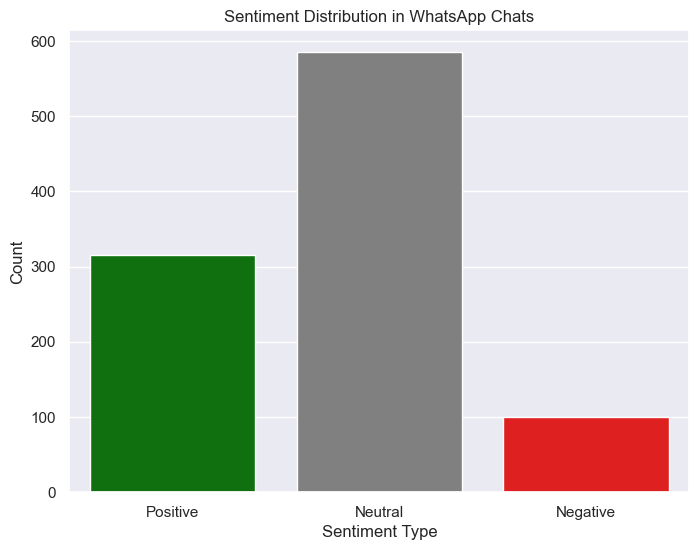

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob


# Sentiment Analysis
sentiments = [TextBlob(msg).sentiment.polarity for msg in chat_data]
sentiment_df = pd.DataFrame({"Message": chat_data, "Sentiment Score": sentiments})

# Categorizing Sentiments
sentiment_df["Sentiment"] = sentiment_df["Sentiment Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))

# Count Sentiment Distribution
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x="Sentiment", data=sentiment_df, palette={"Positive": "green", "Neutral": "gray", "Negative": "red"})
plt.title("Sentiment Distribution in WhatsApp Chats")
plt.xlabel("Sentiment Type")
plt.ylabel("Count")
plt.show()

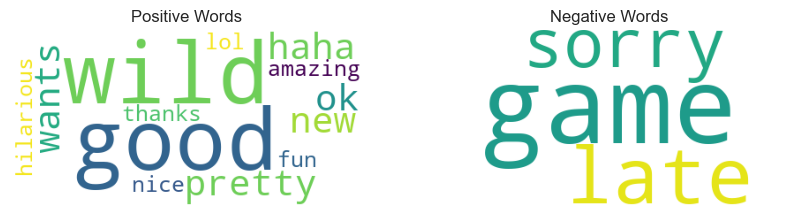

In [24]:
from wordcloud import WordCloud

word_sentiments ={}
for word in filtered_words:
        sentiment_score = TextBlob(word).sentiment.polarity
        word_sentiments[word.lower()] = sentiment_score  # Store sentiment


df_words = pd.DataFrame(word_sentiments.items(), columns=["Word", "Sentiment Score"])

# Categorize Words
df_words["Sentiment"] = df_words["Sentiment Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))



# ** WordCloud for Positive & Negative Words**
positive_words = " ".join(df_words[df_words["Sentiment"] == "Positive"]["Word"])
negative_words = " ".join(df_words[df_words["Sentiment"] == "Negative"]["Word"])

# Generate WordClouds
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Positive Words")
plt.imshow(WordCloud(background_color="white").generate(positive_words))
plt.axis("off")

plt.subplot(1, 2, 2)
plt.title("Negative Words")
plt.imshow(WordCloud(background_color="white").generate(negative_words))
plt.axis("off")

plt.show()
